# Data Analysis for UNSW-NB15 Dataset

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

## Original Data

### Load/Evaluate Data

---

In [2]:
#Load all 4 data files and concatenate them
dataframes = []
for i in range(4):
    file =  pd.read_csv(f'data/UNSW-NB15_{i+1}.csv', delimiter = ",", header=None)
    dataframes.append(file)
data = pd.concat(dataframes)

C:\Python37\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,3,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Python37\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,39,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440039,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,NaN,0
440040,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,NaN,0
440041,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,NaN,0
440042,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,NaN,0


In [4]:
#Rename columns
data.columns = ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'Label']

In [5]:
data

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440039,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,NaN,0
440040,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,NaN,0
440041,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,NaN,0
440042,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,NaN,0


In [6]:
#Check which columns have null values, if any
nan_values = data.isna()
nan_columns = nan_values.any()
columns_with_nan = data.columns[nan_columns].tolist()

print('Amount of null values in columns:')
for col in columns_with_nan:
    print(f'\t{col}: {data[col].isna().sum()}')

Amount of null values in columns:
	ct_flw_http_mthd: 1348145
	is_ftp_login: 1429879
	attack_cat: 2218764


In [7]:
#Check how many data points per attack type
print('Amount of data per attack category type:')
print(pd.value_counts(data['attack_cat']))

Amount of data per attack category type:
Generic             215481
Exploits             44525
 Fuzzers             19195
DoS                  16353
 Reconnaissance      12228
 Fuzzers              5051
Analysis              2677
Backdoor              1795
Reconnaissance        1759
 Shellcode            1288
Backdoors              534
Shellcode              223
Worms                  174
Name: attack_cat, dtype: int64


In [8]:
pd.unique(data['attack_cat'])

array([nan, 'Exploits', 'Reconnaissance', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', 'Backdoors', 'Analysis', ' Reconnaissance ',
       'Backdoor', ' Fuzzers ', ' Shellcode '], dtype=object)

In [9]:
#Attack types had some formatting issues, rename them accordingly
data['attack_cat'] = data['attack_cat'].str.replace(' Fuzzers', 'Fuzzers')
data['attack_cat'] = data['attack_cat'].str.replace(' Reconnaissance', 'Reconnaissance')
data['attack_cat'] = data['attack_cat'].str.replace(' Shellcode', 'Shellcode')

In [10]:
print(pd.value_counts(data['attack_cat']))

Generic            215481
Exploits            44525
Fuzzers             19195
DoS                 16353
Reconnaissance      12228
Fuzzers              5051
Analysis             2677
Backdoor             1795
Reconnaissance       1759
Shellcode            1288
Backdoors             534
Shellcode             223
Worms                 174
Name: attack_cat, dtype: int64


### Pie Chart of Attack Types

---

In [11]:
#Prepare data for pie chart
attack_counts = data['attack_cat'].value_counts()
attack_types = ['Generic', 'Exploits', 'Fuzzers', 'DoS', 'Reconnaissance', 'Analysis', 'Backdoor', 'ShellCode', 'Worms']

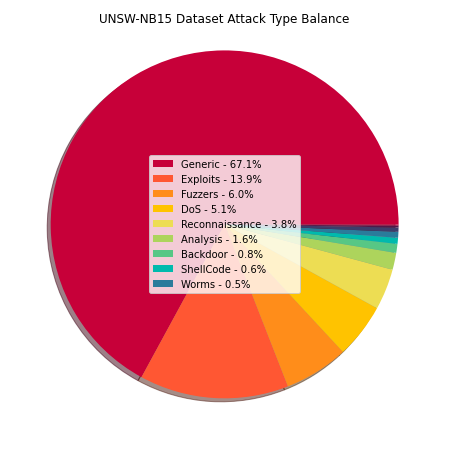

In [12]:
colors2 = ['#C70039', '#FF5733', '#FF8D1A', '#FFC300', '#EDDD53', '#ADD45C', '#57C785', '#00BAAD', '#2A7B9B', '#3D3D6B', '#511849', '#900C3F']
percentages = [67.1, 13.9, 6.0, 5.1, 3.8, 1.6, 0.8, 0.6, 0.5, 0.4, 0.2, 0.1, 0.1]
labels = [f'{l} - {s}%' for l, s in zip(attack_types, percentages)]

plt.figure(figsize=(8, 8))
plt.pie(attack_counts, colors=colors2, radius=1, shadow=True)
plt.legend(labels=labels, loc='center')

plt.title('UNSW-NB15 Dataset Attack Type Balance', y=0.95)

plt.savefig('img/data/attack_types_pie_chart', bbox_inches="tight") 

### Heatmap of Feature Collinearity

---

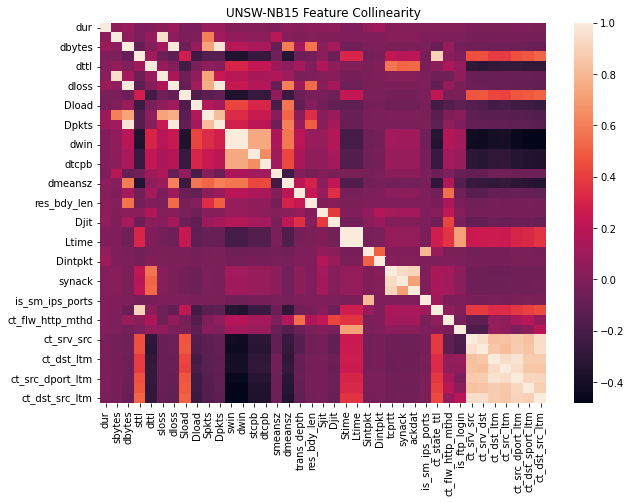

In [13]:
corr = data.loc[:, data.columns != 'Label'].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr)
plt.title('UNSW-NB15 Feature Collinearity')
plt.savefig('img/data/full_data_feature_heatmap', bbox_inches="tight") 

### Pie Chart of Class Balance

---

In [14]:
class_counts = data['Label'].value_counts()
class_counts

0    2218764
1     321283
Name: Label, dtype: int64

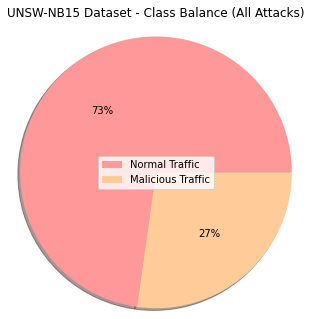

In [33]:
classes = ['Normal Traffic', 'Malicious Traffic']
colors = ['#ff9999','#ffcc99']
plt.figure(figsize=(5, 5))
plt.pie(class_counts, autopct='%1.0f%%', radius=1.25, colors=colors, shadow=True)
plt.legend(labels=classes, loc='center')
plt.title('UNSW-NB15 Dataset - Class Balance (All Attacks)', y=1.05)
plt.savefig('img/data/full_data_class_balance_all_attacks', bbox_inches="tight") 

### Histogram of Feature Distributions

---

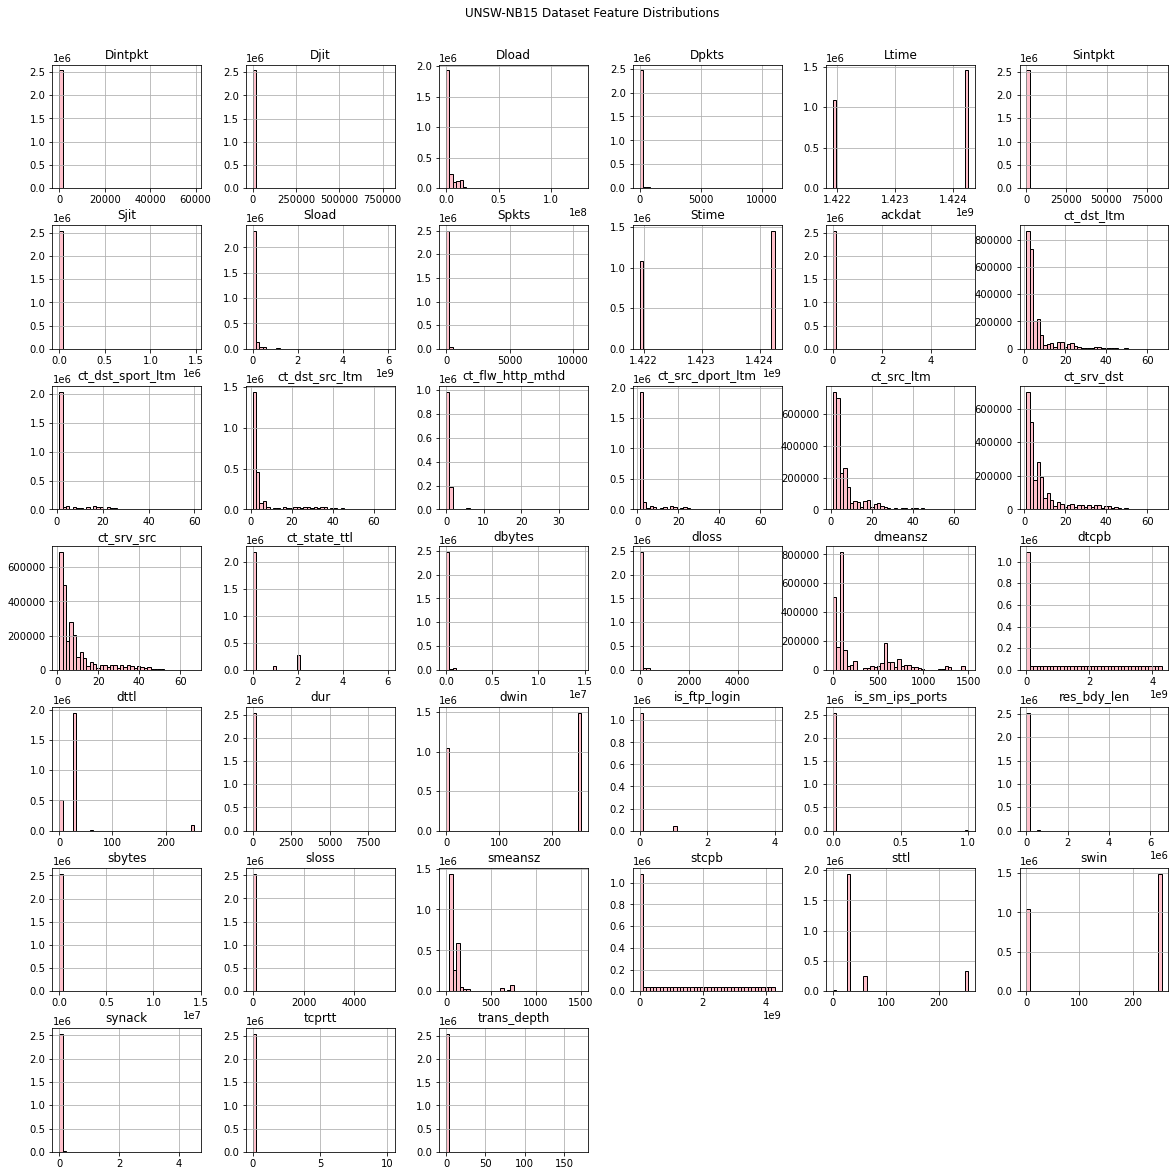

In [16]:
histogram = data.loc[:, data.columns != 'Label'].hist(bins=40, figsize=(20,20), color = "pink", ec="black")
plt.suptitle('UNSW-NB15 Dataset Feature Distributions', y=0.92)
plt.savefig('img/data/full_data_feature_hist', bbox_inches="tight") 

## Balanced Data

### Load Data

---

In [21]:
balanced = pd.read_csv('data/balanced_data.csv', delimiter=",")
balanced

,sport,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,...,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,Label
0,1390,53,udp,CON,0.001055,132,164,31,29,0,...,dns,500473.937500,6.218009e+05,2,2,0,0,0,0,0
1,33661,1024,udp,CON,0.036133,528,304,31,29,0,...,-,87676.085940,5.048017e+04,4,4,0,0,0,0,0
2,1464,53,udp,CON,0.001119,146,178,31,29,0,...,dns,521894.531300,6.362824e+05,2,2,0,0,0,0,0
3,3593,53,udp,CON,0.001209,132,164,31,29,0,...,dns,436724.562500,5.425972e+05,2,2,0,0,0,0,0
4,49664,53,udp,CON,0.001169,146,178,31,29,0,...,dns,499572.250000,6.090676e+05,2,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,35369,80,tcp,FIN,0.289723,864,1390,254,252,2,...,-,21482.587890,3.360451e+04,10,8,255,255,3681792013,1705323518,1
2743,24841,25,tcp,FIN,1.012112,806,1096,254,252,5,...,-,5920.293457,8.046540e+03,14,14,255,255,4198805689,2462692123,1
2744,27333,143,tcp,FIN,1.206070,1010,4962,62,252,6,...,-,6327.991211,3.126850e+04,18,20,255,255,2909098937,254268601,1
2745,25474,88,udp,CON,0.169691,2132,1512,254,60,0,...,-,75384.085940,3.564125e+04,4,2,0,0,0,0,1


### Heatmap of Feature Collinearity

---

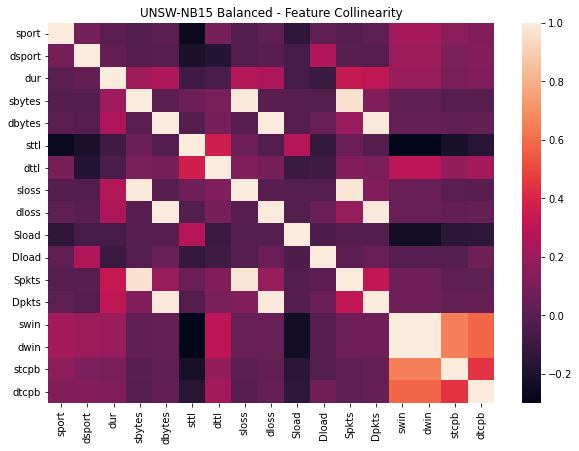

In [22]:
corr = balanced.loc[:, balanced.columns != 'Label'].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr)
plt.title('UNSW-NB15 Balanced - Feature Collinearity')
plt.savefig('img/data/balanced_data_feature_heatmap', bbox_inches="tight") 

### Pie Chart of Class Balance

---

In [34]:
class_counts = balanced['Label'].value_counts()
class_counts

0    1999
1     748
Name: Label, dtype: int64

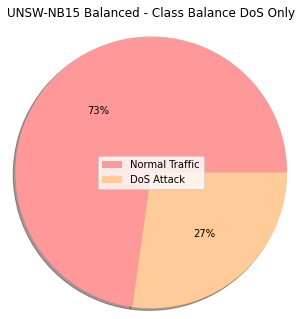

In [35]:
classes = ['Normal Traffic', 'DoS Attack']
colors = ['#ff9999','#ffcc99']
plt.figure(figsize=(5, 5))
plt.pie(class_counts, autopct='%1.0f%%', radius=1.25, colors=colors, shadow=True)
plt.legend(labels=classes, loc='center')
plt.title('UNSW-NB15 Balanced - Class Balance DoS Only', y=1.05)
plt.savefig('img/data/balanced_data_class_balance_dos_only', bbox_inches="tight") 

### Histogram of Feature Distributions

---

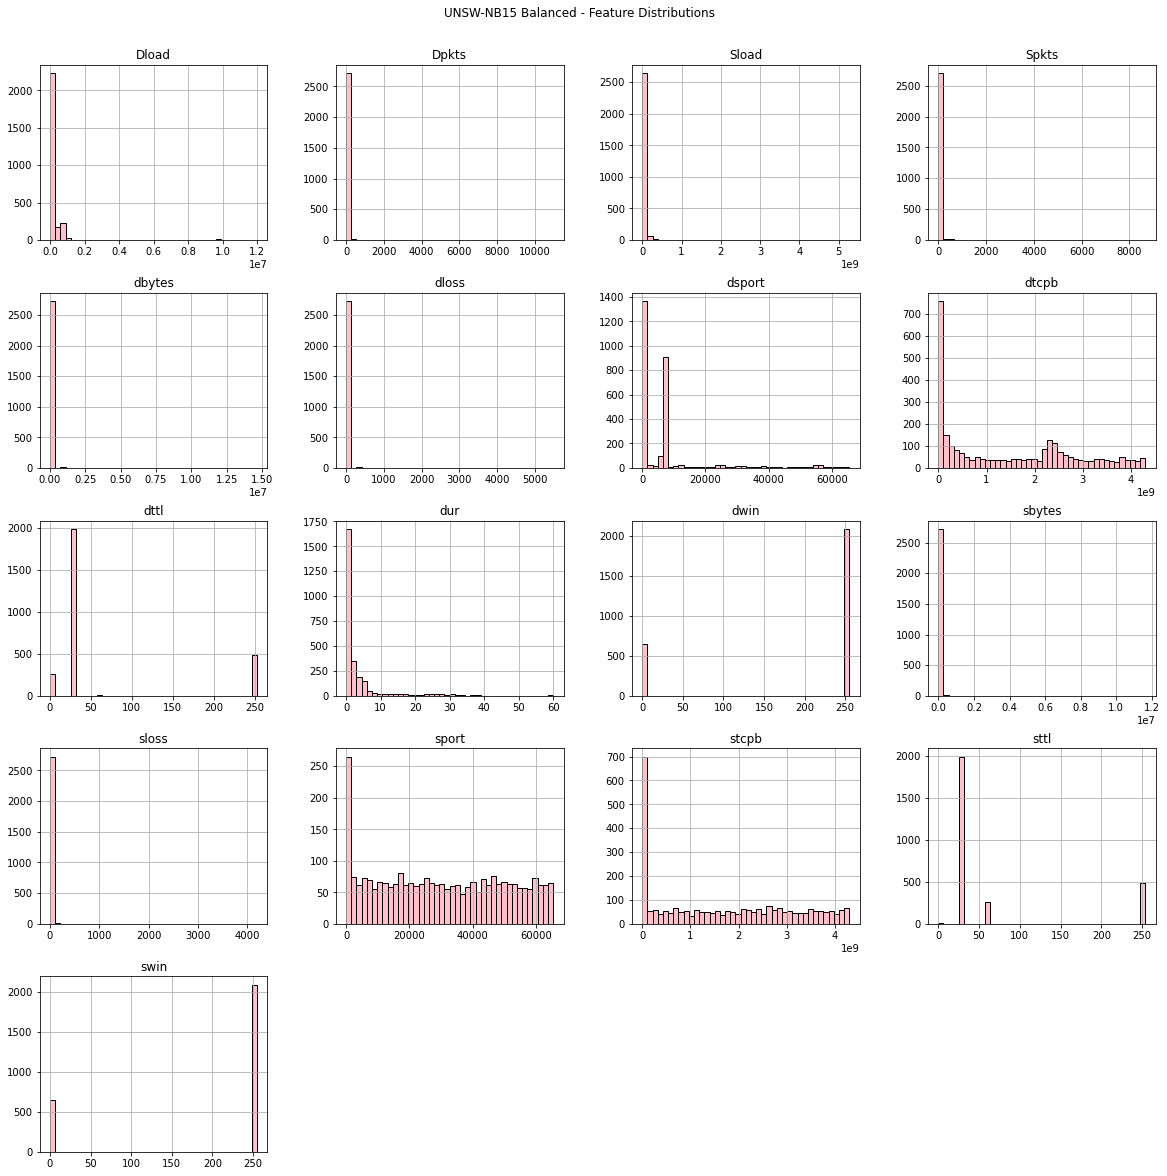

In [41]:
histogram = balanced.loc[:, balanced.columns != 'Label'].hist(bins=40, figsize=(20,20), color = "pink", ec="black")
plt.suptitle('UNSW-NB15 Balanced - Feature Distributions', y=0.92)
plt.savefig('img/data/balanced_data_feature_hist', bbox_inches="tight") 